# Tiny Machine Learning

The intersection of embedded systems and machine learning (**Tiny Machine Learning**) is going to **unlock a whole new world of applications**, much more **responsive** and **interactive**, enabling the possibility to have **always-on machine learning inference**. Just an example: what happens when we say "OK, Google", "Alexa" or "Hey, Siri" to a vocal assistant? It's called **keyword spotting**: we have a machine learning model and a physical device and when we say a specific word the system wakes up. The first step is picking up the audio signals, then there is a local processing to figure out what we are trying to communicate (is it a actually "OK Google" or not) with a visual feedback (e.g. lighting up some leds on the device) to show that it's actually heard. This is fundamental to any embedded system: **input, process, and output**.

![](images/embedded-processing.png)

The input for TinyML devices it is all about sensors. In the particular example of the vocal assistant, we have an acoustic sensor (the microphone that actually picks up the signal):

![](images/sensors.png)

Then the input is processed locally by a **microcontroller** (e.g. Arduino, Raspberry Pi, etc.). The processing part is the most challenging one, because it requires a machine learning model that can be run on a system with limited resources (e.g. memory, power, etc.).

Finally, the output is the feedback that the system gives us. In the case of the vocal assistant, it could be a led lighting up, a sound, or a message on a screen. We can have several physical actuators (e.g. servos, speakers) or digital actuators (screens).

An embedded system is like a regular computer, it has processor, memory, and storage. However, **the way in which these things are composed** makes a big difference between microcontrollers and microprocessors, not only about their respective sizes. When we take a computer system there is a microprocessor and it interfaces with a bunch of different system components. It's only one part of a bigger puzzle that ties together. It is meant for general purpose systems like laptops, desktops, and servers, where we get to **configure** things:

![](images/microprocessor.png)

A microcontroller is very different, **it's already integrated**: processor, memory and storage are all tightly, already coupled together. Moreover it is typically designed for **a fixed function tasks**, like to play music on an MP3 player, or to answer phone calls, so it tends to be preset in its functionality.

![](images/microcontroller.png)

Finally, from a quantitative point of view microprocessor and microcontroller have very **big difference (order of magnitude differences)** in terms of **computing power** (1/4GHz to 1/400MHz), **memory capacity** (16/64GB to 2/512KB), **storage** (1/4TB to 1/2MB), and **power consumption** (30/100W to 1/30MW)

In the embedded system design there is also some issues in the software development side. Typically, what we find is a **three levels of abstractions**: high-level application, libraries (to provide support for applications) and operating system (to provide support for the libraries and the applications). The critical difference is on the operating system level. On a standard computing system, the operating system (Windows, Mac, or Linux for laptop, desktop and servers, or Apple iOS and Android for smartphones) provides a lot of flexibility and on top of that, developer can build different kinds of applications. When we go to an embedded system there isn't a similar support from an operating system, because typically the embedded system is really **specialized to perform a single task**. Some example of operating systems exist (FreeRTOS and Arm Mbed OS), however typically we don't tend to have these installed, because when we add any kind of extra stack on the embedded system, it takes away resources (and we are already constrained).

Also at the level of libraries we don't have uniform and standard situation. For example, in a standard system, libraries like Python NumPy are almost **ubiquitously available** on any system: once we write the code, it can run on virtually any system (Intel or AMD processor does not matter) and uniformly. We just focus on runningyour code. The library creates **a level of abstraction** and we don't need to worry about the details of the lower level. When we are considering an embedded system, this becomes a real problem. There is a **trade-off between portability across systems, and efficency**.

We have a lot of implications that cames from the peculiarities of embedded systems. We need to carafully undestand the task we want to run on them, so we can **understand the requirements**: how complicated is the running task? how much memory does it need to have? how long does the job have to perform (constantly running or intermittently)? Then we are able to **pick the right embedded solution**. 

How machine learning and embedded systems can be composed? While **models are getting bigger and bigger**, we are considering **small resource constrained devices with missing software support**. How and why to pack these models into tiny little devices? Despite the fact that we're building remarkable machine learning processes and datacenters, they only can deal with a small fraction of the data that the world actually is producing. We need to **exploit data where the sensors are producing them**. We need to **move the computation to the data**, instead of **moving the data to the computation**. This is the reason why we need to have machine learning models on the edge, on the device.

Consider the following chart from paper **[Benchmark Analysis of Representative Deep Neural Network Architectures"](https://ieeexplore.ieee.org/document/8506339)**, it show the accuracy of models and the the amount of computational power needed, moreover the size of the circle is telling how big models are:

![](images/benchmark-dnn.png)

Consider AlexNet of 2012, it predicts a thousand classes from ImageNet dataset with 57.1% of accuracy using a model of 61MB in size. Then VGGNet in 2014 boosted the accuracy, but with an enourmous incresing in model size. Then, we realized **we can't just keep making things bigger**, so we tried to make them a bit more efficient while also improving the accuracy. ResNet in 2015 improved the accuracy while shrinking the model size. Then as smartphones became prevalent for machine learning deployments, we saw the evolution move towards mobile nets. With mobile nets the size becomes extremely critical (because models have to fit into the smartphone memory), so we start **compromising the accuracy to dramatically shrunk the size of the network**. MobileNet-v1 in 2015 was really tiny in size with a good accuracy. Since then there have been other networks, but the critical point is that we understood the resource constraints of computing systems. However, the majority of models available are still pretty big. Our little embedded microcontrollers only have a few kilobytes of memory, it's an order of magnitude difference between where usually state of the art sits and how we need to cram things in.

From a model perspective, we have to understand **how we can you shrink or compress the model down** without losing its ability to look for patterns in data. Notice that we can exploit powerful computing infrastructure of a datacenter to execute the algorithm that learns how to detect patterns in the data (**training**), then the embedded device just apply the learned model to look for patterns in new data (**inference**). There is a big difference between "learning how to do things" and and "execute what learned" in computation requirements. For training, tipically we deal with specilized library (e.g. TensorFlow, Keras), to write machine learning code, that we can still exploit. On the embedded system, we don't need to use training frameworks, we need a smaller, leaner and meaner software framework dedicated to meet the specific requirements of inference on the embedded device (e.g. like TesorFlow Lite Micro). So a typical pipeline look like?  We can use a training framework at the beginning in order to learn a model, then after that we convert, optimize and deploy the model on the embedded device. Finally, we need a runtime software able to exectute the inference on constrained devices.

## Quantization

When neural networks were first being developed, the biggest challenge was getting them to work. That meant that **accuracy** and **speed during training** were the top priorities. Using **floating-point arithmetic** was the easiest way to preserve accuracy, and GPUs were well-equipped to accelerate those calculations, so it’s natural that not much attention was paid to other numerical formats. The floating-point format is very flexible, it can represent a wide range of numbers, and it can represent very small numbers with high precision (like scientific notation):

![](images/scientific-notation.png)

The IEEE 754 standard for floating-point numbers is widely used in computer systems, and it defines several formats, like 32-bit single precision and 64-bit double precision:

![](images/ieee754.png)

Moreover, neural networks are trained through stochastic gradient descent, applying many tiny modifications to the weights, and these small increments typically need floating-point precision to work, otherwise we can get into the **vanishing gradient** problem.

The needs for inference are very different, it's computation demands **grow with the number of users**. That means that **inference efficiency** has become a burning issue for the deployment of models. That is where **quantization** comes in: store numbers and perform calculations using **more compact formats** than floating-point:

![](images/float-int.png)

For example, we're going to take a value that's expressed in float 32-bits (which takes 4 bytes) and compress it down into an integer 8-bits (only 1 byte), so we get a 4x reduction.

Mathematically, a floating point value 

$\displaystyle x \in [m, M]$ 

is **quantized to a b-bit integer** (tipically 8-bit signed or unsigned):  

$\displaystyle x_q \in [m_q, M_q]$

using a **scale factor** $s$ and a **zero-point** $z$:

$\displaystyle x_q = \text{round}(\frac{x}{s} + z)$

instead, the **de-quantization** process is defined as:

$\displaystyle x = s(x_q - z) $

where scale and zero point are parameters which can be derived in order to assure the mapping between the extreme values of the floating point range and the integer range. 

So we would just have to solve a linear system:

$\displaystyle m = s(m_q - z)$

$\displaystyle M = s(M_q - z)$

The solution is:

$\displaystyle s = \frac{M - m}{M_q - m_q}$

$\displaystyle z = \frac{m M_q - M m_q}{m - M}$

In practice, we can have chance to have some values outside the range, thus the corresponding quantized value will also be outside of its range and we need to **clip the values that are outside the range**: 

$\displaystyle x_q = \text{clip}(\text{round}(\frac{x}{s} + z), m_q, M_q)$

As an example, if the integer type is **signed INTb** then:

$\displaystyle (m_q, M_q) = (-2^{b-1}, 2^{b-1}-1)$

else, if the integer type is **unsigned UINTb** then:

$\displaystyle (m_q, M_q) = (0, 2^b-1)$

Let's try to write it in Python:

In [15]:
import numpy as np

def quantization(x, s, z, min_q, max_q):
    x_q = np.round(1 / s * x + z, decimals=0)
    x_q = np.clip(x_q, a_min=min_q, a_max=max_q)
    return x_q.astype(int)

In [2]:
def dequantization(x_q, s, z):
    x_d = s * (x_q - z)
    return x_d.astype(float)

In [3]:
def generate_quantization_parameters(min, max):
    bits = np.dtype(int).itemsize
    min_q = -np.power(2, bits-1).astype(int)
    max_q = (np.power(2, bits-1) - 1).astype(int)
    s = ((max - min) / (max_q - min_q)).astype(float)
    z = ((max_q * min - max * min_q) / (min - max)).astype(float)
    return s, z, min_q, max_q

Suppose to have floating point values ranging from -6 to 5 and an 4 bit signed conversion:

In [4]:
min = -6
max = 5

In [5]:
s, z, min_q, max_q = generate_quantization_parameters(min=min, max=max)

In [6]:
print("s = ", s)
print("z = ", z)
print("min_q = ", min_q)
print("max_q = ", max_q)

s =  0.043137254901960784
z =  11.090909090909092
min_q =  -128
max_q =  127


We can quantize and then de-quantize some values:

In [7]:
x = -5.4

x_q = quantization(x, s, z, min_q, max_q)
x_d = dequantization(x_q, s, z)

print("x = ", x)
print("x_q = ", x_q)
print("x_d = ", x_d)

x =  -5.4
x_q =  -114
x_d =  -5.396078431372549


And we can plot the quantization value as a function of the floating point value:

In [8]:
x = np.arange (min-2, max+2, 0.001)
x_q = quantization(x, s, z, min_q, max_q)

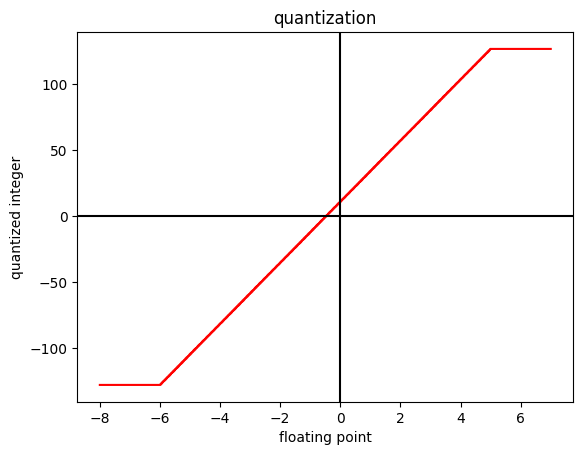

In [9]:
import matplotlib.pyplot as plt

plt.plot(x, x_q, 'r')
plt.title('quantization')
plt.ylabel('quantized integer')
plt.xlabel('floating point')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

We can zoom in to see the effect of quantization:

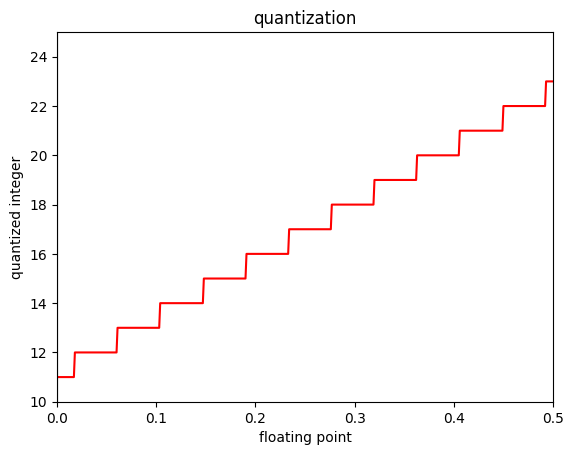

In [10]:
plt.plot(x, x_q, 'r')
plt.title('quantization')
plt.ylabel('quantized integer')
plt.xlabel('floating point')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(0, 0.5)
plt.ylim(10, 25)
plt.show()

As you can see, the quantization is not perfect, but it's a good approximation. When we reconstruct the original value from the quantized one, we can see that there is a difference, which is called **quantization error**. We can evaluate this error: 

In [11]:
x = np.arange(min, max, 0.1).astype(float)  

x_q = quantization(x, s, z, min_q, max_q)
x_d = dequantization(x_q, s, z)

errors = x_d - x
max_error = np.max(errors)

print("Max Error  : ", max_error)

Max Error  :  0.019607843137289027


We can apply quantization to a model in order to optimize it to run on smaller systems. In a neural network, we have neurons that have weights and biases, and we have activations that are going out the neuron, and can perform quantization at various different levels. The first one is doing **quantization with weights**, because they play a **major role in terms of storage**. We can observer, from experimentation, that the weight values tend to be very concentrated around certain critical ranges. For example, the following figure shows the network distribution of weights for AlexNet:

![](images/weights-distribution.png)

Thanks to this observation, we can actually quantize weights without losing the general representation of that space. In practice, we are binning the original floating point values of weights into an 8-bit encoding scheme:

![](images/encoding.png)

Now the network is actually 8 bits and we can save it in order to **shrunk the model size down by 4x**. Then when we start running it to do the inference, we take the 8-bit values and reconstruct them into a 32-bit floating point value:

![](images/deconding.png)

Notice that we can have some **side effects**. Sometimes we can have a situation where two floating point values are close to each other and they fall into the same integer bucket, and when we decompress the value, it comes into the same floating point value, and we **lost some resolution** that we previously have in the original. This is a trade-off we should take into account:

![](images/resolution-lost.png)

In the end, once the dequantization function finishes, we have a floating-point value back from the stored integer value, and then we can perform floating-point operations like in a standard neural network. The benefit is that the size of the model is smaller and in general if our scale is smaller, it is more likely to have smaller errors.

This is the first step of the quantization scheme (**quantized weight compression**) and it is done for size reduction and we assume to have floating point arithmetic capability. 

## Quantized inference

We can be interested also in **speed up the inference** and we can do operations with integer arithmetic. Suppose we have to perform the typical matrix operation of a layer of neurons with 

- $n$ features, 
- $m$ samples,
- $q$ neurons

The output value for a neuron and an input sample is:

$\displaystyle \hat{y} = \sum\limits_{k=0}^{n} \theta_k x_k$ 

so we have $n$ multiplications and additions to compute this single entry. To complete the computation, given the numbers of samples and neurons, we would need to do a total of $m\cdot q\cdot n$ multiplications and additions.

We can execute the operation using the quantized values of sample and weights:

$\displaystyle \hat{y} = \sum\limits_{k=0}^{n} s_\theta (\theta_{q;k} - z_\theta) s_x (x_{q;k} - z_x) =$ 

$\displaystyle = s_\theta s_x \sum\limits_{k=0}^{n} (\theta_{q;k} - z_\theta) (x_{q;k} - z_x) =$ 

$\displaystyle = s_\theta s_x \sum\limits_{k=0}^{n} \left( \theta_{q;k} x_{q;k} - \theta_{q;k} z_x - z_\theta x_{q;k} + z_\theta z_x \right) =$ 

$\displaystyle = s_\theta s_x \left( \sum\limits_{k=0}^{n} \theta_{q;k} x_{q;k} - z_x \sum\limits_{k=0}^{n} \theta_{q;k} - z_\theta \sum\limits_{k=0}^{n} x_{q;k} + n z_\theta z_x  \right)$

Notice that several terms are constant during the inference, because they don't depend on the particular sample input and can be computed offline:

- $\displaystyle z_x \sum\limits_{k=0}^{n}{\theta_{q;k}}$

- $\displaystyle n z_\theta z_x$

and the term

- $\displaystyle \sum\limits_{k=0}^{n}{\theta_{q;k} x_{q;k}}$

suggests that we can do the multiply and accumulate operations using integer arithmetic. This is important because the floating-point arithmetic implemented in silicon is often slower than the integer arithmetic (one/two versus ten or more cycles). It is almost an order of magnitude different in terms of the computational performance requirements. So reducing a model using integer values actually gives also an **improvement in performance**. Moreover, such operation could be done in parallel (considering all neurons of a layer and more than a single input sample) and **employing special hardware** accelerators that runs much faster than conventional integer multiplication.

However, in a neural network, the output of a neuron becomes the input of another neuron, so we need to quantize this value before inputting it to the next layer. We can do this by applying the same quantization scheme as before, but we need to take into account that the range of the output of a neuron is different from the range of the input of a neuron. We can have a different scale factor and zero point for the output of a neuron and the input of a neuron:

$\displaystyle \hat{y}^{(i)}_{q;j} = \frac{\hat{y}^{(i)}_j}{s_y}+ z_y$

we can insert this in the behaviour of the neuron in order to provide in output the quantized value:

$\displaystyle \hat{y}^{(i)}_{q;j} = \frac{s_\theta s_x}{s_y} \left( \sum\limits_{k=0}^{n} \theta_{q;j,k} x^{(i)}_{q;k} - z_x \sum\limits_{k=0}^{n} \theta_{q;j,k} - z_\theta \sum\limits_{k=0}^{n} x^{(i)}_{q;k} + n z_\theta z_x  \right) +  z_y$

Notice that scale and zero point for weights and input can be calculated before the inference, because their ranges are already available. But how we can calculate scale and zero point for activations? One possibility is to use **dynamic quantization**, in which scale and zero point are calculated on-the-fly (online during inference) and are specific for each forward pass. This means that the activations are always stored in float and they are converted to integers while processing and back to floating point after the processing is done. We can also use **static quantization** to pre-computes scales and zero points also for all the activations in order to eliminate this overhead. However, we need some representative data in order to collect the distribution statistics for all the activation of each neuron and compute an estime of scales and zero points. The short-coming is that if the data is not representative, the scales and zero points computed might not reflect the true scenario during inference, and the inference accuracy will be harmed.

So we can compose the neural network as a list of layers:

$\displaystyle y_0 = \theta_0^T x$

$\displaystyle y_1 = \theta_1^T y_0$

$\displaystyle y_2 = \theta_2^T y_1$

$\displaystyle ...$

$\displaystyle y_{n-1} = \theta_{n-1}^T y_{n-2}$

$\displaystyle y = \theta_{n}^T y_{n-1}$

if $Q$ is the quantization function, $MQ$ is the quantized operation previously defined and $D$ is the de-quantization function, we can convert all steps in a quantized neural network:

$\displaystyle x_q = Q(x, s_x, z_x)$

$\displaystyle y_{0,q} = MQ(\theta_{0,q}, x_q)$

$\displaystyle y_{1,q} = MQ(\theta_{1,q}, y_{0,q})$

$\displaystyle y_{2,q} = MQ(\theta_{2,q}, y_{1,q})$

$\displaystyle ...$

$\displaystyle y_{n-1,q} = MQ(\theta_{n-1,q}, x_{n-2,q})$

$\displaystyle y_q = MQ(\theta_{n,q}, y_{n-1,q})$

$\displaystyle y = D(y_q, s_y, z_y)$

We can write in Pyton the implementation of a quantized neuron:

In [12]:
def quantized_neuron(theta_q, x_q, s_x, z_x, s_theta, z_theta):
    y = (s_theta * s_x) * (np.dot(theta_q, x_q) - z_x * np.sum(theta_q) - z_theta * np.sum(x_q) + x_q.shape[0] * z_theta * z_x)
    return y.astype(float)

We can make an example comparing the results of a standard neuron with the one of a quantized neuron on a random input sample:

In [13]:
m = 3 # number of features

In [14]:
x_min = -1.0
x_max = 1.0
x = np.random.uniform(low=x_min, high=x_max, size=m).astype(np.float32)

print('x =', x) 

x = [ 0.9075121  -0.03181699 -0.9695162 ]


In [15]:
theta_min = -1.0
theta_max = 1.0
theta = np.random.uniform(low=theta_min, high=theta_max, size=m).astype(np.float32)

print('theta =', theta)

theta = [-0.5364919  -0.43967542 -0.5394929 ]


In [16]:
y = np.dot(theta, x)

print('y =', y)

y = 0.050163418


In [17]:
s_x, z_x, x_min_q, x_max_q = generate_quantization_parameters(min=x_min, max=x_max)
x_q = quantization(x, s_x, z_x, x_min_q, x_max_q)

print('x_q =', x_q)

x_q = [ 115   -5 -124]


In [18]:
s_theta, z_theta, theta_min_q, theta_max_q = generate_quantization_parameters(min=theta_min, max=theta_max)
theta_q = quantization(theta, s_theta, z_theta, theta_min_q, theta_max_q)

print('theta_q =', theta_q)

theta_q = [-69 -57 -69]


We can now use the quantized inference to evaluate the output of the neuron. However we don't know the scale and zero point of the output of the neuron and we don' have any statistical data about the possible value. So we can define a **safety margin**:

In [19]:
y_d = quantized_neuron(theta_q, x_q, s_x, z_x, s_theta, z_theta)

print('y_d =', y_d)

y_d = 0.04935024990388311


In order to check the result, we can try to make the computation using the dequantized values:

In [20]:
x_d = dequantization(x_q, s_x, z_x)
theta_d = dequantization(theta_q, s_theta, z_theta)

y_d_expected = np.dot(theta_d, x_d)

print('y_d_expected =', y_d_expected)

y_d_expected = 0.04935024990388312


Notice that the neuron output computed using the quantized calculation is close to the expected value computed using floating point values and calculations. 

In addition to matrix multiplications, deep learning models also have **non-linear activation layers** (such as ReLU), how we can deal with these layers using quantized inference? A trivial solution is to de-quantize the input to these layers, use ordinary floating point computations, and then quantize the output. This will work if there are only a few layers in the model or there are no special implementations to handle these layers in a quantized manner. However, in most of the deep learning models, the number of such layers are not negligible, and using this trivial solution is likely to slow down the inference significantly. The other solution is to **deal with each individual layers**. As an example, we can consider the quantized version of the ReLU activation function: 

$\displaystyle \text{ReLU}(x,x_t,y_v,k)= \Big\{ \begin{matrix} y_v  \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \text{if} \enspace x < x_t \\ y_v + k(x-x_t) \enspace \text{if} \enspace x\geq x_t \end{matrix}$

This might look different from the the conventional ReLU definition, but such definition is more generalized and is convenient for the demonstration of quantized ReLU.

The common ReLU is a special case where $x_t=0$, $y_v=0$ and $k=1$

$\displaystyle \text{ReLU}(x,0,0,1)= \Big\{ \begin{matrix} 0 \enspace \text{if} \enspace x < 0 \\ x \enspace \text{if} \enspace x\geq 0 \end{matrix}$

In [21]:
def relu(x, x_t, y_v, k):
    x = np.clip(x, a_min=x_t, a_max=None)
    y = y_v + k * (x - x_t)
    return y

In [22]:
x_t = 0
y_v = 0
k = 1

x = np.arange (-5, 5, 0.1)
y = relu(x, x_t, y_v, k)

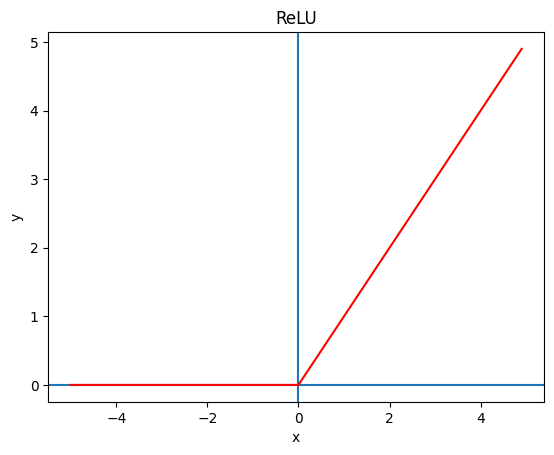

In [23]:
plt.title('ReLU')
plt.axhline(y=0)
plt.axvline(x=0)
plt.plot(x, y, 'r')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

Then let’s derive how the quantized ReLU mathematically:

$\displaystyle y = s_y(y_q - z_y) = \text{ReLU}(s_x(x_q-z_x),0,0,1)= \Big\{ \begin{matrix} 0 \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \text{if} \enspace s_x(x_q-z_x) < 0 \\ s_x(x_q-z_x) \enspace \text{if} \enspace s_x(x_q-z_x)\geq 0 \end{matrix} =$

$\displaystyle = \Big\{ \begin{matrix} 0 \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \text{if} \enspace x_q < z_x \\ s_x(x_q-z_x) \enspace \text{if} \enspace x_q \geq z_x \end{matrix}$

therefore,

$\displaystyle y_q = \Big\{ \begin{matrix} z_y \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \enspace \text{if} \enspace x_q < z_x \\ z_y + \frac{s_x}{s_y} (x_q-z_x) \enspace \text{if} \enspace x_q \geq z_x \end{matrix} = \text{ReLU}(x_q, z_x, z_y, {s_x}/{s_y})$

So it becomes apparent that to do the quantized ReLU corresponding to the standard  ReLU, we just have to do a generalized ReLU with

$y_q = ReLU(x_q, z_x, z_y,  {s_x}/{s_y})$

In [24]:
def quantized_relu(x_q, s_x, z_x, s_y, z_y):
    y_q = relu(x_q, z_x, z_y, s_x/s_y).astype(int)
    return y_q

We can plot the quantized ReLU function:

In [25]:
x_max = -6
x_min = 6
s_x, z_x, x_q_min, x_q_max  = generate_quantization_parameters(x_max, x_min)

x = np.arange (-6, 6, 0.001)
x_q = quantization(x, s_x, z_x, x_q_min, x_q_max)

In [26]:
y_min = -10.0
y_max = 10.0
s_y, z_y, y_q_min, y_q_max = generate_quantization_parameters(y_max, y_min)

y_q = quantized_relu(x_q, s_x, z_x, s_y, z_y)
y_d = dequantization(y_q, s_y, z_y)

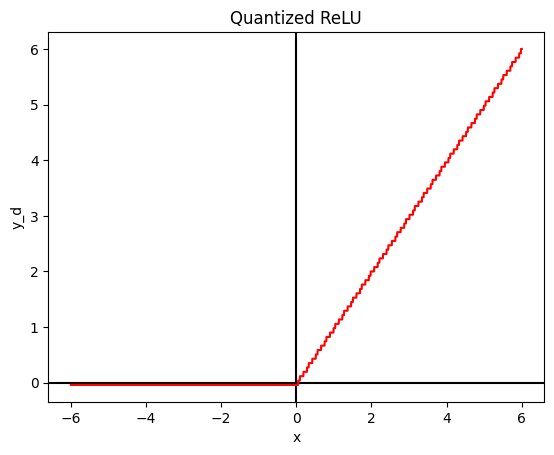

In [27]:
plt.title('Quantized ReLU')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x, y_d, 'r')
plt.ylabel('y_d')
plt.xlabel('x')
plt.show()

We can zoom in around zero:

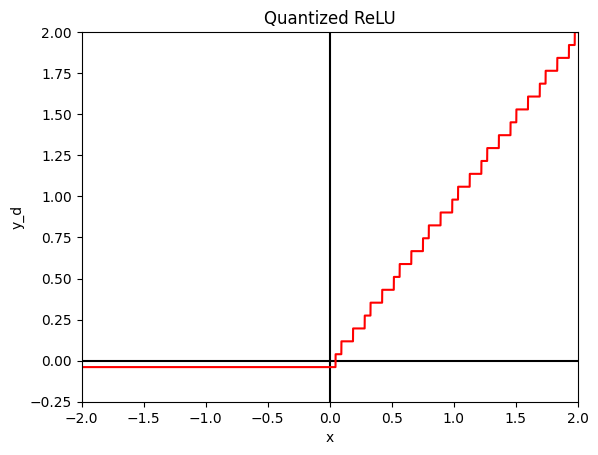

In [28]:
plt.title('Quantized ReLU')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x, y_d, 'r')
plt.ylabel('y_d')
plt.xlabel('x')
plt.xlim(-2, 2)
plt.ylim(-0.25, 2)
plt.show()

Another benefit of quantization is that we can **cut down the power consumption**. It is a similar reason as the silicon aspect, floating point arithmetic is also more power hungry. A final benefit is **portability**, which is crucial in embedded systems. These systems often make very aggressive trade-offs and in some cases an embedded silicon might support floating point arithmetic, but another might not support it. Instead the integer arithmetic is a common baseline that is actually available across all of the different systems.

This method is called **post-training quantization** because we are quantizing the model after it has been trained. This is the most common method because it is the easiest to implement and can be applied to model already existing. However, it is not the most efficient method because the model has been trained using floating point arithmetic, and the quantization process can introduce errors that were not present during training. 


## TensorFlow Lite

In [1]:
############ WARNING ###########################################
# TensorFlow v2.16.1 introduces breaking changes with Keras 3.0. 
# we need to continue using Keras 2.0, do the following
# in order to properly use TFLite
# https://github.com/tensorflow/tensorflow/issues/63849

import os;
os.environ["TF_USE_LEGACY_KERAS"]="1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2" 

import tf_keras as keras
############ WARNING ###########################################

[**TensorFlow Lite**](https://www.tensorflow.org/lite) is a set of tools to help developers run TensorFlow models on mobile, embedded, and IoT devices. It enables on-device machine learning inference with low latency and a small binary size. TensorFlow Lite uses many techniques for optimization, including quantization. We can consider the MNIST dataset in order to introduce the possibiliy of making optimizations using this tool:

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

In [4]:
import tensorflow as tf

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
results = model.fit(train_images, train_labels, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
1688/1688 [==============================] - 10s 2ms/step - loss: 0.3284 - accuracy: 0.9058 - val_loss: 0.1684 - val_accuracy: 0.9528
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1610 - accuracy: 0.9537 - val_loss: 0.1180 - val_accuracy: 0.9675
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.9686 - val_loss: 0.0876 - val_accuracy: 0.9755


In [6]:
model.save("./models/base_model.keras")

How big is the model? We can check the size of the model:

In [7]:
import os
print("Keras model in kB:", os.path.getsize('./models/base_model.keras') / float(2**10))

Keras model in kB: 102.1318359375


Now, we can use the TFLite **Converter** to generate a [FlatBuffer](https://flatbuffers.dev/) representation (identified by the .tflite file extension), which is an **efficient cross-platform serialization format** for all major high level languages and performance-critical applications. The main advantage of this format is that it allows access to the serialized data without parsing or unpacking:

In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpfu15vo2a/assets


INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpfu15vo2a/assets
W0000 00:00:1716208265.270160 35395823 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1716208265.270201 35395823 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


It's now a TensorFlow Lite model, but it's still using 32-bit float values for all parameter data. We can save it:

In [10]:
import pathlib

tflite_model_path = pathlib.Path("./models/lite_model.tflite")
tflite_model_path.write_bytes(tflite_model)

print("TFlite model in kB:", os.path.getsize('./models/lite_model.tflite') / float(2**10))

TFlite model in kB: 82.62109375


Notice that the file is compressed, which is good for a mobile device, but too big for an embedded system. We can ask the converter to apply the **dynamic range post-training quantization** by setting the  optimizations property in order to quantize the already-trained model. The converter provides few options for what we can do with optimization: 

- **OPTIMIZE_FOR_SIZE** performs optimizations to make the model as small as possible
- **OPTIMIZE_FOR_LATENCY** will perform optimizations that reduce inference time as much as possible
- **DEFAULT** try to optimize for both. 

In general, models can be made up to about **four times smaller** with a **two to three time speed-up**.

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT] 

To quantize also the variable data (input/output and intermediates between layers) and performing the **static quantization**, we need to provide a **representative dataset** large enough to represent typical values. This allows the converter to estimate the dynamic range for all the variable data. We need to implement a generator function (yield), which provides values one at a time, rather than returning a single result:

In [12]:
def representative_data_gen():
  for input_value in train_images[:100]:
    # convert input_value to FLOAT32
    input_value = np.float32(input_value)
    yield [input_value.reshape(1, *input_value.shape)]

converter.representative_dataset = representative_data_gen

To maintain compatibility with applications that use values, the converter leaves the model input and output tensors in float. This is good for compatibility, but it won't be compatible with devices that perform only integer-based operations (such as integer only hardware accelerators). So to ensure an end-to-end integer-only model, you need a couple more parameters:

In [13]:
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Set the input and output tensors to uint8
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

Now we can quantize the model:

In [16]:
tflite_quantized_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmplb_6a26e/assets


INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmplb_6a26e/assets
/Users/riccardo.berta/miniconda3/envs/machine-learning/lib/python3.12/site-packages/tensorflow/lite/python/convert.py:964: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1716208476.133315 35395823 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1716208476.133330 35395823 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: UINT8


Let's save the converted models to file to check the recuction:

In [17]:
tflite_quantized_model_path = pathlib.Path("./models/quantized_model.tflite")
tflite_quantized_model_path.write_bytes(tflite_quantized_model)

print("TFlite quantize model in kB:", os.path.getsize('./models/quantized_model.tflite') / float(2**10))

TFlite quantize model in kB: 23.90625


With the optimization property set we got a more compressed model. Depending on the model type, there can be a loss in accuracy, so be sure to test thoroughly to see if the losses are acceptable. When we have a converted model, we can use the TFlite **Interpreter** to run the model and make inferences. The interpreter is designed to be lean and fast, it uses a static graph ordering and a custom (less-dynamic) memory allocator to ensure minimal load, initialization, and execution latency. It is provided for most common mobile/embedded platforms such as Android, iOS and Linux, in multiple programming languages. It is also available (as [TensorFlow Lite Micro](https://www.tensorflow.org/lite/microcontrollers), written in C++ 17 and tested on Arm Cortex-M Series architecture) to run models on microcontrollers locally with minimum memory requirements of around a few kilobytes, without requiring any OS support or other high-level language libraries as dependencies for running the inference on the device. Notice that running a model with the interpreter involves some steps: we need to load the model in memory, allocate tensors for input and output, prepare data accordingly, invoke the inference and finally read the output values. In general, an important task in running models on embedded systems is to **format data to the needs of the model**. For example, you might be grabbing frames from a camera that has a particular resolution and encoding, but you need to decode them to another format to be used with the model. A large part of any engineering for ML systems is performing this conversion. We can use the interpreter to measure the performance of the model:

In [18]:
interpreter = tf.lite.Interpreter(model_content=tflite_quantized_model)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Let's check that the input and output vectors should be integers:

In [19]:
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

print('input: ', input_details['dtype'])
print('output: ', output_details['dtype'])

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


We can also access the quantization parameters, which are useful to quantize the input before feeding it into the network:  

In [20]:
input_scale, input_zero_point = input_details["quantization"]

print("Scale: ", input_scale)
print("Zero point: ", input_zero_point)

Scale:  0.003921568859368563
Zero point:  0


The interpreter operates on one example at a time, not on batches. Some confusion arise from the fact that the input tensor shape still needs to include the batch dimension. This is because models are typically designed to handle batches. So, even though the interpreter processes one example at a time, it expects the input tensor to have a batch dimension. This simplifies the implementation and allows the model to be used in various scenarios without modification. Let's make a prediction for each element in the test set in order to evaluate quantized model performances:

In [21]:
def test_quantized_model(interpreter, images, labels):
  predictions = []

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]
  input_scale, input_zero_point = input_details["quantization"]

  for image in images:
  
    # rescale input data to uint8
    image = image / input_scale + input_zero_point
    
    # add batch dimension and convert to the input data format
    image = np.expand_dims(image, axis=0).astype(input_details["dtype"])

    # set the input tensor
    interpreter.set_tensor(input_details['index'], image)

    # run inference
    interpreter.invoke()

    #get the output tensor and make the prediction
    output = interpreter.get_tensor(output_details["index"])[0]
    prediction = output.argmax()

    predictions.append(prediction)

  accuracy = (predictions == labels).mean()
  return accuracy, predictions

Finally we can calculate the accuracy of the quantized model and compare it with the accuracy of the baseline model:

In [22]:
quantized_model_accuracy, predictions = test_quantized_model(interpreter, test_images, test_labels)
print('Quantized test accuracy:', quantized_model_accuracy)

Quantized test accuracy: 0.9722


In [23]:
_, baseline_model_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Baseline test accuracy:', baseline_model_accuracy)

Baseline test accuracy: 0.972100019454956


In that case the drop on performace is not evident. The reason for this is that the trained model tend to cope very well with high levels of noise in the inputs. This ability means that it seems to **treat low-precision calculations as just another source of noise**, and still produce accurate results even with numerical formats that hold less information.

## Quantization-aware training

Post-training quantization provide a reduction in size (4x) of models and an decrease in latency (2/3x). However, there is a trade-off: the accuracy is going to decrease because quantization introduces **information loss** (floating point values after quantization and de-quantization are not exactly recoverable) and therefore the inference accuracy from the quantized models is inevitably lower than accuracy of the floating point models. Mathematically, it means:

$\displaystyle x = f_d(f_q(x,s_x,z_x),s_x,z_x) + \Delta_x$

where $\Delta_x$ is quantization error.

Is there anything we can do to **improve the accuracy while keeping the benefits of quantization**? The idea is to **inform the network** about the quantization error in order to allow the network to learn how to become **resilient** against this error. **Quantization aware training** asks the neural network to take into account the effect of information loss during training. Therefore, we add a quantization and a de-quantization layer for each tensor. Mathematically, it means:

$\displaystyle \hat{x} = D(Q(x,s_x,z_x),s_x,z_x) = s_x(\text{clip}(\text{round}(\frac{x}{s_x}+z_x),M_q,m_q)-z_x)$

the scale and zero point could be estimated using the same method of static quantization. In that way, all the data types for the quantized tensors are still floating point tensors and the training is supposed to be done normally as if the quantization and de-quantization layers were not existed. We have **injected the quantization error into the training pipeline**, so that the network naturally learns how to cope with this source of error. Quantization-aware training is **not guaranteed to always be able to do better**.This is part of the "black box magic" with neural networks, so we have another hyperparameter that we have to think about. Another interesting thing is that sometimes **it does even better that the original floating-point network**. We cannot control exactly what's happen in quantization because when we are doing quantization-aware training, the network is **learning differently** from the way it originally learned. 

To apply quantization-aware training we need to **extend the network in order to mimic the quantized behavior that would be happening during the inference time**. We can use the **[TensorFlow Model Optimization toolkit](https://www.tensorflow.org/model_optimization)**, which a suite of tools for optimizing ML models for deployment and execution. Among many uses, the toolkit supports techniques used to quantize a model. We can apply this tecniques to our running example on MNIST:

In [49]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantize_model(model)

Now we have a model that is aware of the quantization process and we can compile and then train it:

In [50]:
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLa  (None, 28, 28)            3         
 yer)                                                            
                                                                 
 quant_reshape (QuantizeWra  (None, 28, 28, 1)         1         
 pperV2)                                                         
                                                                 
 quant_conv2d (QuantizeWrap  (None, 26, 26, 12)        147       
 perV2)                                                          
                                                                 
 quant_max_pooling2d (Quant  (None, 13, 13, 12)        1         
 izeWrapperV2)                                                   
                                                                 
 quant_flatten (QuantizeWra  (None, 2028)              1

Notice that the whole model has all layers now prefixed by "quant". The resulting model is **quantization aware but not quantized** (e.g. the weights are float32 instead of int8). 
When we train the network, it is **implicitly learning to be resilient to the quantization error**:

In [51]:
results = q_aware_model.fit(train_images, train_labels, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0692 - accuracy: 0.9789 - val_loss: 0.0671 - val_accuracy: 0.9830
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0572 - accuracy: 0.9835 - val_loss: 0.0637 - val_accuracy: 0.9827
Epoch 3/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0510 - accuracy: 0.9848 - val_loss: 0.0655 - val_accuracy: 0.9822


In [52]:
_, baseline_model_accuracy = model.evaluate(test_images, test_labels, verbose=0)
_, q_aware_model_accuracy = q_aware_model.evaluate(test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Quantized test accuracy:', q_aware_model_accuracy)

Baseline test accuracy: 0.9764000177383423
Quantized test accuracy: 0.9781000018119812


The accuracy of the quatization aware model is better than the one of the baseline model, probably becouse it is more robust against noise. However, it is not always guaranteed to work, and it is not always guaranteed to be better than the original model. After training, we can convert it into a quantized model using the TFLite converter:

In [53]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_quantized_aware_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpnv4yk9hy/assets


INFO:tensorflow:Assets written to: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpnv4yk9hy/assets
/Users/riccardo.berta/miniconda3/envs/machine-learning/lib/python3.12/site-packages/tensorflow/lite/python/convert.py:964: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1715178491.058328 29715240 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1715178491.058341 29715240 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: UINT8


to check the size:

In [54]:
tflite_quantized_aware__model_path = pathlib.Path("./models/quantized_aware_model.tflite")
tflite_quantized_aware__model_path.write_bytes(tflite_quantized_aware_model)

print("TFlite quantize aware model in kB:", os.path.getsize('./models/quantized_aware_model.tflite') / float(2**10))

TFlite quantize aware model in kB: 24.2578125


and performance using the interpreter:

In [55]:
interpreter = tf.lite.Interpreter(model_content=tflite_quantized_aware_model)
interpreter.allocate_tensors()

In [56]:
quantized_aware_model_accuracy, predictions = test_quantized_model(interpreter, test_images, test_labels)
print('Quantized aware test accuracy:', quantized_aware_model_accuracy)

Quantized aware test accuracy: 0.9777


## Pruning

Neural networks are usually **over-parameterized** with significant redundancy in the number of required neurons. This results into unnecessary computation and memory usage at inference time. The concept of **pruning**, much like in gardening, involves the **selective removal of certain parts** (less important neural network connections and nodes). The objective is to make a model smaller, improve its inference time, while maintaining a good accuracy/performance.

![](images/pruning.png)

First of all we need to better understand the meaning of "non-significance" for a parameter. Consider the following function:

$\displaystyle f(x) = x + 5x^2$

we have two terms $x$ and $x^2$ with weights $1$ and $5$, respectively. However, we can see that the behavior of the function does not change much when the first coefficient is modified:

In [57]:
def f(x, a):
    return a * x + 5 * x**2

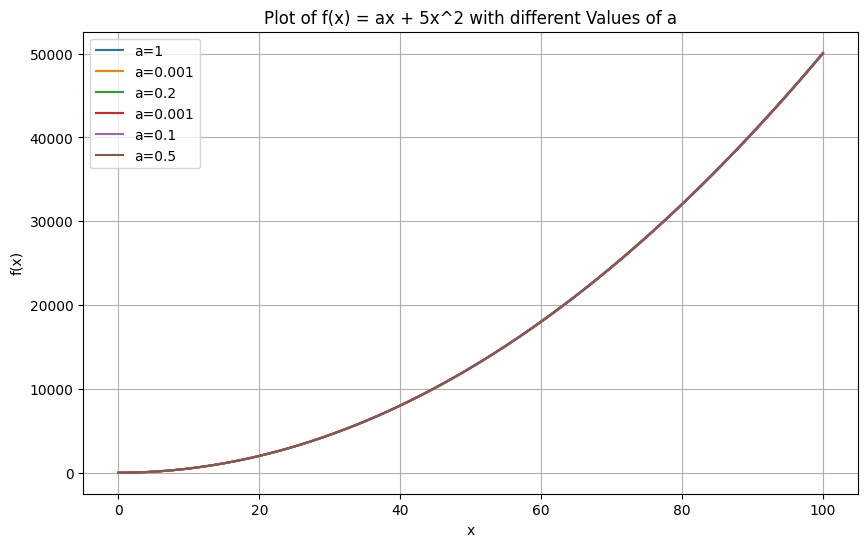

In [58]:
x = np.linspace(0, 100, 100) 
a_values = [1, 0.001, 0.2, 0.001, 0.1, 0.5]

plt.figure(figsize=(10, 6))

for a in a_values:
    plt.plot(x, f(x, a), label=f'a={a}')

plt.title('Plot of f(x) = ax + 5x^2 with different Values of a')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Here the weight of the first element can be referred to as **non-significant**. Discarding those coefficients won't really change the behavior of the function. This concept can be applied to neural networks as well. In order to understand what we can prune, we can plot the distribution of the weights across the different layers. For example using the model previously trained over the MNIST dataset:

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 12)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2028)              0         
                                                                 
 dense (Dense)               (None, 10)                20290     
                                                                 
Total params: 20410 (79.73 KB)
Trainable params: 20410 (79.73 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [60]:
def plot_weights_distribution(model, layer='dense'):
    layer_names = [layer.name for layer in model.layers]
    layer_weights = [layer.get_weights() for layer in model.layers]
    
    for layer_name, weights in zip(layer_names, layer_weights):
        if layer_name == layer:
            flattened_weights = [w.flatten() for w in weights]
            all_weights = np.concatenate(flattened_weights)
            
            plt.figure()
            plt.hist(all_weights, bins=128)
            plt.title('Layer: ' + layer_name)
            plt.xlabel('weight Value')
            plt.ylabel('frequency')
            plt.show()

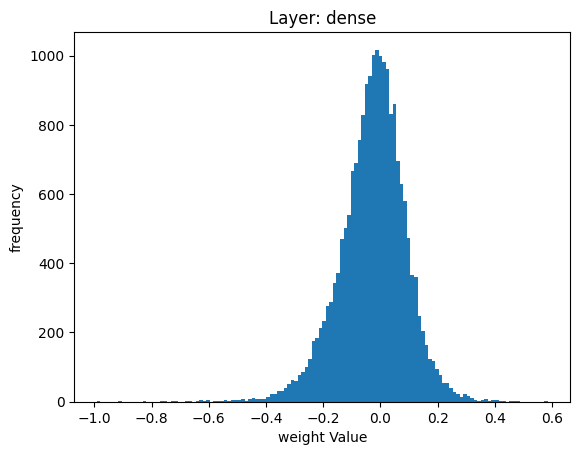

In [61]:
plot_weights_distribution(model)

We can observe that overall the weights are approximately normally distributed around 0. However, how could we make sense of the weights that are non-significant? We need to consider that during the optimization process some of the weights are updated with larger gradient magnitudes than others, so the **weights that receive relatively small gradients can be considered non-significant**. After the training is complete, we can inspect the weight magnitudes of a network layer by layer and figure out the weights that are significant. This decision can be made using several heuristics.

In **magnitude-based pruning**, we consider weight magnitude to be the criteria for pruning. By pruning, what we really mean is **zeroing out the non-significant weights**. We sort the weight magnitudes in a descending manner and pick up the ones that appear earlier in the queue. This is combined with a **sparsity level** (percentage of weights to be pruned) we would want to achieve.

The following function prunes the weights of the dense layers of a Keras model to achieve a desired sparsity. It preserves the sparsity across layers and sets the pruned weights to zero:

In [62]:
def prune_model(model, sparsity):
    new_weights = []
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights = layer.get_weights()
            w = weights[0]
            b = weights[1] if layer.use_bias else None
            flat_weights = w.flatten()
            num_to_prune = int(sparsity * len(flat_weights))
            sorted_indices = np.argsort(np.abs(flat_weights))
            prune_indices = sorted_indices[:num_to_prune]
            flat_weights[prune_indices] = 0
            w = flat_weights.reshape(w.shape)
            new_weights.append(w)
            if b is not None:
                new_weights.append(b)
            else:
                new_weights.extend(weights)
        else:
            new_weights.extend(layer.get_weights())

    pruned_model = tf.keras.models.clone_model(model)
    pruned_model.set_weights(new_weights)

    pruned_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

    return pruned_model

In [63]:
pruned_model = prune_model(model, sparsity=0.2)

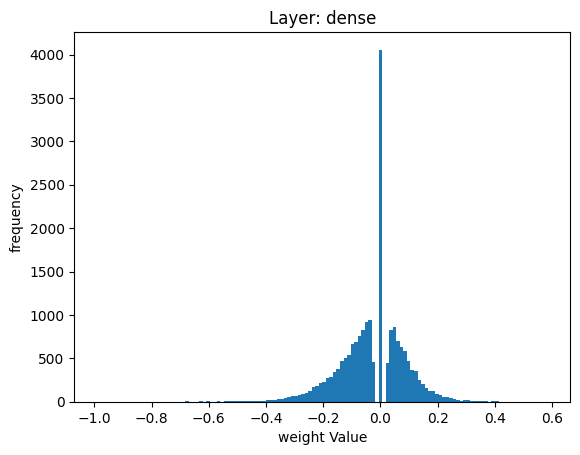

In [64]:
plot_weights_distribution(pruned_model)

In [65]:
_, pruned_accuracy = pruned_model.evaluate(test_images, test_labels, verbose=0)
print('Test Accuracy: ', pruned_accuracy)

Test Accuracy:  0.9767000079154968


When pruning a model, it is crucial to strike **a balance between model size reduction and preserving accuracy**. Pruning too aggressively can result in significant accuracy degradation, while pruning conservatively may not yield substantial benefits in terms of model compression. Let's iterate over different sparsity levels, prunes the model for each level, measures the accuracy, and then plots the accuracy loss: 

In [66]:
sparsity_levels = np.linspace(0, 1, 25) 

accuracies = []

for sparsity in sparsity_levels:
    pruned_model = prune_model(model, sparsity)
    _, pruned_accuracy = pruned_model.evaluate(test_images, test_labels, verbose=0)
    accuracies.append((pruned_accuracy-baseline_model_accuracy)/baseline_model_accuracy*100)

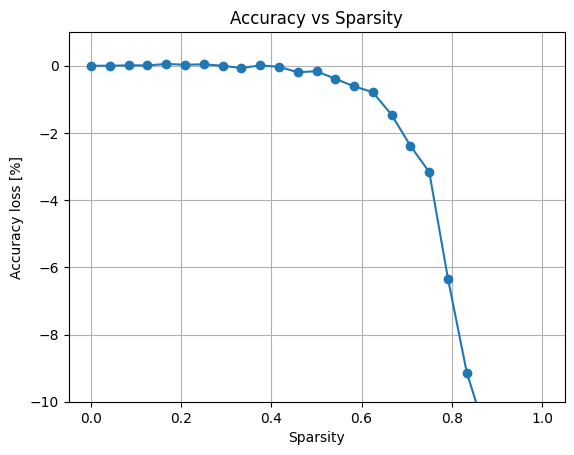

In [67]:
plt.plot(sparsity_levels, accuracies, marker='o')
plt.title('Accuracy vs Sparsity')
plt.xlabel('Sparsity')
plt.ylabel('Accuracy loss [%]')
plt.ylim((-10, 1))
plt.grid(True)
plt.show()

Therefore, various pruning algorithms and **heuristics** have been developed to guide the pruning process and find the optimal trade-off between size and performance. The **weight magnitude criterion** is quite intuitive and surprisingly efficient. Another criterion is the **magnitude of the gradient**, we can accumulate gradients over a minibatch of training data and prune on the basis of the product between this gradient and the corresponding weight of each parameter. One final aspect to take into consideration is whether the chosen criterion is **applied globally** to all parameters, or if it is computed independently for each layer. While global pruning has proven many times to yield better results, it can lead to layer collapse. A simple way to avoid this problem is to resort to layer-wise local pruning, namely pruning the same rate at each layer (as we have done before), when the used method cannot prevent layer collapse.

When we apply this idea to a deep network, we need to observe that **different layers have varying levels of tolerance to pruning**. For instance, the deeper layers can usually tolerate more extensive pruning. This is because these layers are primarily responsible for refining the decisions and predictions based on the features already identified and processed by the preceding layers. They don’t need as many weights to compute the final output, as the majority of critical information has already been distilled at this point. On the other hand, the initial layers are typically more sensitive to pruning. This is due to their foundational role in the model: these layers are responsible for extracting and processing the low-level features from the input data. These features form the basis for all subsequent computations and decision-making processes within the model.

It's often advisable to **retrain the network for a few extra epochs**, with the lowest learning rate, to give it a chance to recover from the loss in performance induced by pruning. Usually, the pruning and retraing can be **iterated**, with each time a growing pruning rate. Iterating has shown to improve performance, at the cost of extra computation and training time. 

Finally, simply pruning weights can lead to a sparse model (where only a small fraction of parameters are non-zero) with disconnected neurons, which may result in suboptimal performance. Most frameworks and hardware **cannot accelerate sparse matrices computation**, meaning that no matter how many zeros WE fill the parameterS with, it will not impact the actual cost of the network. To mitigate this issue, **structured pruning** can be employed. It involves pruning in a way that **directly alters the architecture of the network, removing entire neurons** (or groups of neurons, like convolution filters) instead of individual weights.

XXX Pruning with Keras https://www.tensorflow.org/model_optimization/guide/pruning/pruning_with_keras


We can apply quantization to the pruned model for additional benefits.

## Knowledge distillation

**[Knowledge distillation]()** is tecnique in which an already trained complex and high perfroming model is used to govern a smaller model on what to do and how to do a particular task, without losing accuracy. This is exactly similar to a teacher transferring his knowledge to a student in a school. The student has no prior experience in executing the task, however he executes it with the knowledge imparted by the teacher in handling similar situations. Similarly, through knowledge distillation, smaller models are trained using the knowledge acquired by a large model:

![](images/distillation.png)

The **transfer of knowledge** is comparable to the lectures given by the teacher to the students: we train the smaller model based on the outputs received through training the larger models. In order to understand what knowledge gets distilled from the teacher to the learner, consider an example of MNIST dataset. Let’s pick a sample picture of number 3. In training data, this number translates to a corresponding one-hot-vector like [0,0,0,1,0,0,0,0,0,0] (**hard targets**). This simply tells that the number in the image is 3, but fails to explicitly mention anything about the shape of number 3, like the shape of 3 is similar to 8. Using an already trained model, **we can get the distribution of probabilities across all classes, even the wrong ones**. So, the teacher can instruct the student about the fact that the shape of the number in the example image is 3, but he can also suggests that the shape of 3 is quite similar to the shape of numbers 8 and 0 (**soft targets**). Then we can train the student model taking into account the generated output of the teacher model. In the classification problems, the teacher outputs logits that are computed for each class, we use a softmax layer to normalize these logits into probabilities:

$\displaystyle p_i = \frac{e^{z_i/T}}{\sum_{j} e^{z_j/T}}$

where T is the **temperature parameter** and can be used to control the influence of the teacher. Higher temperature results in a softer probability distribution over classes. In order to understand the effect of the temperature parameter, we can plot the probability distribution for different values of T in a situation with three classes:

- Dataset values: 0, 1, 0
- Teacher output: 0.1, 0.7. 0.2 

In [68]:
dataset_values = np.array([0, 1, 0])
teacher_probs = np.array([0.1, 0.7, 0.2])

In [69]:
def softmax(p, T):
    exp_p = np.exp(p / T)
    return exp_p / np.sum(exp_p)

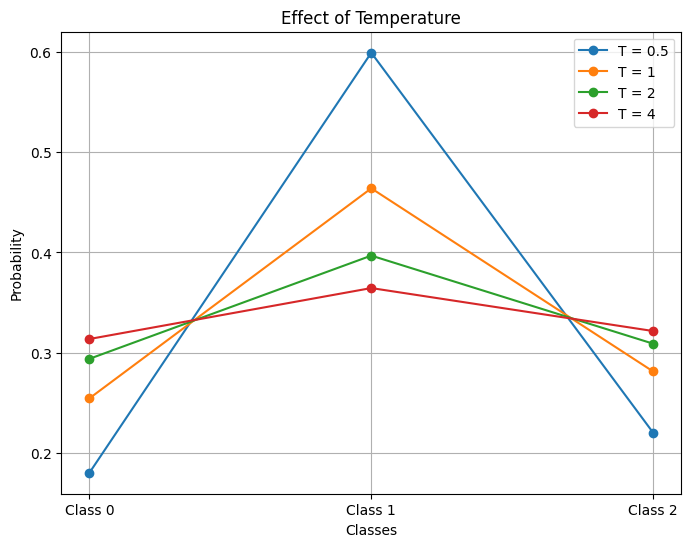

In [70]:
T_values = [0.5, 1, 2, 4]
class_indices = np.arange(len(dataset_values))

plt.figure(figsize=(8, 6))
for T in T_values:
    student_probs = softmax(teacher_probs, T)
    plt.plot(class_indices, student_probs, marker='o', label=f"T = {T}")

plt.xlabel("Classes")
plt.ylabel("Probability")
plt.title("Effect of Temperature")
plt.xticks(class_indices, [f"Class {i}" for i in class_indices])
plt.legend()
plt.grid(True)
plt.show()

The main idea is to train the student model adding a contribution to the loss (**student loss**) based on the difference between its output and the output of the teacher model (**distillation loss**):

$\displaystyle L = (1-\alpha) SL(y_{true}, y_{student}) + \alpha  DL(p_{teacher},p_{student})$

where $\alpha$ is a hyperparameter that controls the influence of the distillation loss.

![](images/distillation-loss.png)

But how we can calculate the distillation loss? Mathematically we can use the **Kullback-Leibler divergence** to measure how much information we lose when we choose the approximation. It is a measure of how one probability distribution differs from a second, reference probability distribution. KL Divergence has its origins in information theory. The primary goal of information theory is to quantify how much information is in data, and the most important metric is called Entropy, typically denoted as H and defined as 

$\displaystyle H(p) = - \sum_{i} p(i) \log p(i)$

We can use this notion to quantify how much information we lost when we use the student distribution Q instead of the teacher distribution P, given that the actual distribution is P:

$\displaystyle D_{KL}(P||Q) = \sum_{i} p(i) (\log p(i) - \log q(i)) = \sum_{i} p(i) \log \frac{p(i)}{q(i)}$

It may be tempting to think of KL divergence as a distance metric, however we cannot use KL divergence to measure the distance between two distributions. The reason for this is that KL divergence is not symmetric.

In [71]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

As an example, the KL divergence between some normal distributions with differen means and same standard deviation is:

In [72]:
from scipy.stats import norm

x = np.arange(-10, 10, 0.001)

p = norm.pdf(x, 0, 2)
q1 = norm.pdf(x, 0.5, 2)
q2 = norm.pdf(x, 1, 2)
q3 = norm.pdf(x, 2, 2)

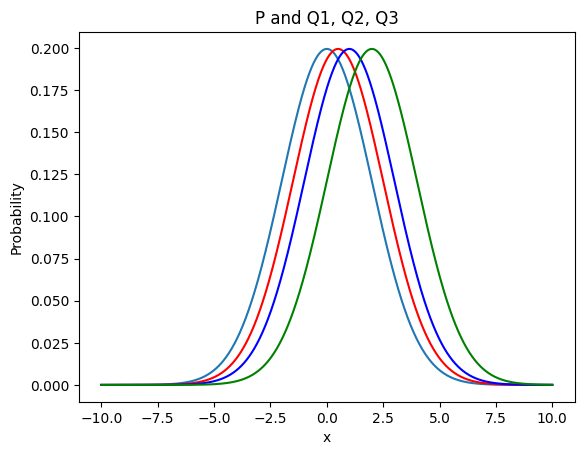

In [73]:
plt.title('P and Q1, Q2, Q3')
plt.plot(x, p)
plt.plot(x, q1, c='red')
plt.plot(x, q2, c='blue')
plt.plot(x, q3, c='green')
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()

In [74]:
print('KL(P||Q1) = %1.3f' % kl_divergence(p, q1))
print('KL(P||Q2) = %1.3f' % kl_divergence(p, q2))
print('KL(P||Q3) = %1.3f' % kl_divergence(p, q3))

KL(P||Q1) = 31.250
KL(P||Q2) = 125.000
KL(P||Q3) = 500.000


We can plot the KL divergence value as a function of the difference of mean of the two normal distributions:

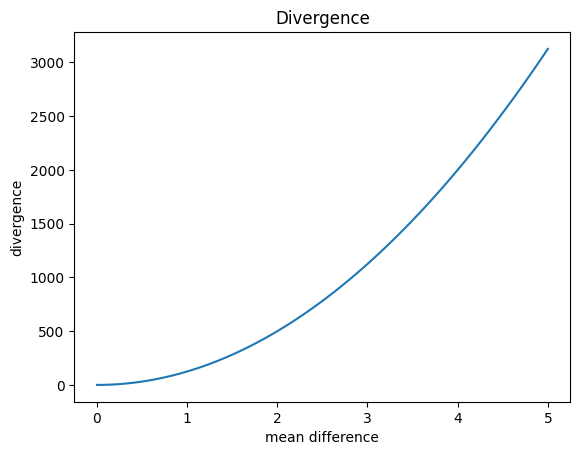

In [75]:
q_mean_range = np.linspace(0, 5, 100)

kl_values = []
for q_mean in q_mean_range:
    q = norm.pdf(x, q_mean, 2)
    kl_values.append(kl_divergence(p, q))

plt.title('Divergence')
plt.xlabel("mean difference")
plt.ylabel("divergence")
plt.plot(q_mean_range, kl_values)
plt.show()


Using the runnging example of MNIST dataset, we can create a teacher model and a cheap and small student model:

In [76]:
teacher_model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

In [77]:
teacher_params = teacher_model.count_params()
print("Total number of teacher parameters:", teacher_params)

Total number of teacher parameters: 20410


In [78]:
student_model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation="relu"),
  keras.layers.Dense(10)
])

# make some copy of the student model for later comparison
student_scratch_model = keras.models.clone_model(student_model)
student_limited_model = keras.models.clone_model(student_model)

In [79]:
student_params = student_model.count_params()
print("Total number of student parameters:", student_params)

Total number of student parameters: 2395


We assume that the teacher is trained and fixed. Thus, we start by training the teacher model on the training set in the usual way:

In [80]:
teacher_model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
results = teacher_model.fit(train_images, train_labels, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.9143 - val_loss: 0.1342 - val_accuracy: 0.9640
Epoch 2/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1359 - accuracy: 0.9609 - val_loss: 0.0968 - val_accuracy: 0.9728
Epoch 3/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0986 - accuracy: 0.9717 - val_loss: 0.0782 - val_accuracy: 0.9790


We use the teacher to prepare the soft targets dataset:

In [82]:
temperature = 0.8

teacher_outputs = teacher_model.predict(train_images)
soft_targets = tf.nn.softmax(teacher_outputs / temperature)

1875/1875 [==============================] - 2s 752us/step


To focus on the distillation power, we set the $\alpha$ parameter to 1, which means that the distillation loss is the only contribution to the loss calculatoin. We define a custom loss function:

In [83]:
def distillation_loss(soft_targets, y_pred):
    y_pred_soft = tf.nn.softmax(y_pred / temperature)
    loss = tf.reduce_mean(tf.keras.losses.kullback_leibler_divergence(soft_targets, y_pred_soft))
    return loss

We compile the student model in order to use the custom loss fucntion:

In [84]:
student_model.compile(optimizer='adam', 
              loss=distillation_loss,
              metrics=['accuracy'])

Finally, we train the student model on the new **transfer dataset**:

In [85]:
results = student_model.fit(train_images, soft_targets, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
1688/1688 [==============================] - 2s 752us/step - loss: 1.1039 - accuracy: 0.5971 - val_loss: 0.6969 - val_accuracy: 0.7542
Epoch 2/3
1688/1688 [==============================] - 1s 657us/step - loss: 0.6820 - accuracy: 0.7540 - val_loss: 0.5823 - val_accuracy: 0.7918
Epoch 3/3
1688/1688 [==============================] - 1s 667us/step - loss: 0.6251 - accuracy: 0.7690 - val_loss: 0.5505 - val_accuracy: 0.7908


We can evaluate and compere the accuracy of the two models on the test set:

In [86]:
def evaluate_model(model, x_test, y_test):
    predictions = np.argmax(model.predict(x_test, verbose=0), axis=1)
    true_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
    accuracy = np.mean(true_classes == predictions)
    return accuracy

In [87]:
teacher_accuracy = evaluate_model(teacher_model, test_images, test_labels)
print('Teacher test accuracy:', teacher_accuracy)

student_accuracy = evaluate_model(student_model, test_images, test_labels)
print('Student test accuracy:', student_accuracy)

Teacher test accuracy: 0.9749
Student test accuracy: 0.7658


In order to better understand the power of knowledge distillation, we train the student models using a dataset with one of the classes removed. The teacher model was trained with the whole dataset. This means that the student model never encounter the removed class examples during its training, but thanks to knowledge distillation, it can be able to identify this class:

In [88]:
keep_indices = np.where(train_labels != 3)[0]

train_images_filtered = train_images[keep_indices]
train_labels_filtered = train_labels[keep_indices]

In [89]:
student_limited_model.compile(optimizer='adam', 
              loss=distillation_loss,
              metrics=['accuracy'])

In [90]:
temperature = 0.8

teacher_outputs_filtered = teacher_model.predict(train_images_filtered)
soft_targets_filtered = tf.nn.softmax(teacher_outputs_filtered / temperature)

1684/1684 [==============================] - 1s 845us/step


In [91]:
results = student_limited_model.fit(train_images_filtered, soft_targets_filtered, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
1516/1516 [==============================] - 2s 788us/step - loss: 1.0940 - accuracy: 0.5909 - val_loss: 0.6894 - val_accuracy: 0.7423
Epoch 2/3
1516/1516 [==============================] - 1s 661us/step - loss: 0.6736 - accuracy: 0.7463 - val_loss: 0.5716 - val_accuracy: 0.8008
Epoch 3/3
1516/1516 [==============================] - 1s 661us/step - loss: 0.5783 - accuracy: 0.7990 - val_loss: 0.5012 - val_accuracy: 0.8361


We test the model only on a subset of the test set composed by the removed class:

In [92]:
mask = (test_labels == 3)

test_images_3 = test_images[mask]
test_labels_3 = test_labels[mask]

As we can see, the student model is able to identify the removed class, even if it has never seen it during the training. This is the power of knowledge distillation.

In [93]:
student_limited_accuracy = evaluate_model(student_limited_model, test_images_3, test_labels_3)
print('Student limited test accuracy:', student_accuracy)

Student limited test accuracy: 0.7658


We can also train an equivalent student model from scratch without the teacher, in order to check if it can identify the removed class:

In [94]:
student_scratch_model.compile(optimizer='adam', 
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=['accuracy'])

In [95]:
results = student_scratch_model.fit(train_images_filtered, train_labels_filtered, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
1516/1516 [==============================] - 2s 732us/step - loss: 1.2778 - accuracy: 0.6034 - val_loss: 0.8428 - val_accuracy: 0.7808
Epoch 2/3
1516/1516 [==============================] - 1s 620us/step - loss: 0.8017 - accuracy: 0.7838 - val_loss: 0.6610 - val_accuracy: 0.8298
Epoch 3/3
1516/1516 [==============================] - 1s 617us/step - loss: 0.7032 - accuracy: 0.8024 - val_loss: 0.6017 - val_accuracy: 0.8402


As expected, the student model trained from scratch is not able to identify the removed class.

In [96]:
student_scratch_accuracy = evaluate_model(student_scratch_model, test_images_3, test_labels_3)
print('Student scratch test accuracy:', student_scratch_accuracy)

Student scratch test accuracy: 0.0


The performance of the student model are worse than the teacher model since it has far less parameters, however it is smaller and it has :

In [97]:
teacher_model.save("./models/teacher_model.keras")
student_model.save("./models/student_model.keras")

In [98]:
print("Teacher model in kB:", os.path.getsize('./models/teacher_model.keras') / float(2**10))
print("Student model in kB:", os.path.getsize('./models/student_model.keras') / float(2**10))

Teacher model in kB: 102.1435546875
Student model in kB: 27.5693359375


## Exercise

**1 - Add some dense layers to the pre-trained [MobileNetV2](https://paperswithcode.com/method/mobilenetv2) model, then fine-tune it over the [cats vs dogs image classification problem](https://www.kaggle.com/competitions/dogs-vs-cats) using transfer learning. Then apply post-quantization optimizations and check difference in size and performances**

We can donwload the dataset from [TensorFlow Datasets (TFDS)](https://github.com/tensorflow/datasets):

In [28]:
import tensorflow_datasets as tfds

(raw_train, raw_validation, raw_test), metadata = tfds.load('cats_vs_dogs', 
                                                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], 
                                                            with_info=True, 
                                                            as_supervised=True)

The data are ready, and we can see we have like 23,000 samples in two classes:

In [29]:
num_examples = metadata.splits['train'].num_examples
num_classes = metadata.features['label'].num_classes

class_names = ['cat', 'dog']
print("Examples: ", num_examples)
print("Classes: ", num_classes)

Examples:  23262
Classes:  2


Then we set the training batches and validation batches also resizing the examples in images:

In [30]:
import tensorflow as tf
def format_image(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return  image, label

In [31]:
batch_size = 32

train_batches = raw_train.shuffle(num_examples // 4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = raw_validation.map(format_image).batch(batch_size).prefetch(1)
test_batches = raw_test.map(format_image).batch(1)

We can show some example from the dataset in order to get an idea of the task:

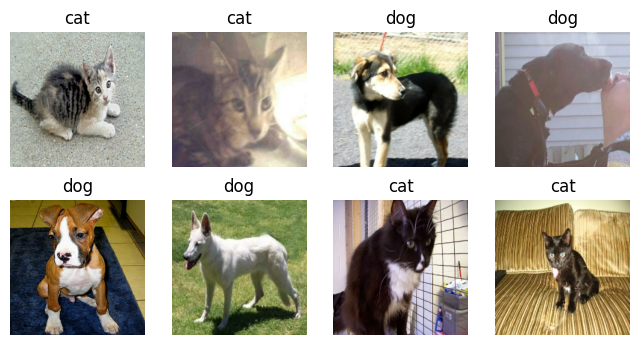

2024-05-20 11:45:10.611543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
import matplotlib.pyplot as plt

rows = 2
columns = 4

plt.figure(figsize=(2*columns,2*rows))
for images, labels in train_batches.take(1):
    for i in range(rows*columns):
        plt.subplot(rows, columns, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

Then we get the pre-trained MobileNetV2 model without the top classification layers and we freeze the base model layers: 

In [33]:
mnet_base = keras.applications.mobilenet_v2.MobileNetV2(input_shape = (224, 224, 3,),
                                                        include_top = False)
mnet_base.trainable = False

We add some dense layers:

In [34]:
model = keras.Sequential([mnet_base,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_classes, activation='softmax')
                         ])

We compile the model and get somt information:

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2422210 (9.24 MB)
Trainable params: 164226 (641.51 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In this way, instead of taking time over many epochs of training, we can **fine tune** the training over few epochs:

In [37]:
results = model.fit(train_batches, epochs=2, verbose=1, validation_data=validation_batches)

Epoch 1/2
582/582 [==============================] - 89s 132ms/step - loss: 0.0615 - accuracy: 0.9783 - val_loss: 0.0450 - val_accuracy: 0.9841
Epoch 2/2
582/582 [==============================] - 77s 131ms/step - loss: 0.0381 - accuracy: 0.9853 - val_loss: 0.0479 - val_accuracy: 0.9807


We check the size and the performance of the model:

In [38]:
model.save("./models/mobilenet_model.keras")

In [14]:
import os
print("MobileNet model in MB:", os.path.getsize('./models/mobilenet_model.keras') / float(2**20))

MobileNet model in MB: 11.013620376586914


In [39]:
print('Training Accuracy: ', results.history['accuracy'][0])
print('Validation Accuracy: ', results.history['val_accuracy'][0])

Training Accuracy:  0.9783449769020081
Validation Accuracy:  0.9840928912162781


Now we use the TFLite converter to create a quantized version of the MobileNet:

In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_data_gen():
    for input_value, _ in test_batches.take(100):
        yield [input_value]
        
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

quantized_model = converter.convert()

/Users/riccardo.berta/miniconda3/envs/machine-learning/lib/python3.12/site-packages/tensorflow/lite/python/convert.py:964: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1716198502.725125 35248275 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1716198502.725171 35248275 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-05-20 11:48:22.725407: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpr564wag4
2024-05-20 11:48:22.737777: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-20 11:48:22.737787: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/np/rkxq5s9x6lzdnx_24x0j3jx80000gn/T/tmpr564wag4
2024-05-20 11:48:22.842662: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-05-20 11:

Check size and performance:

In [48]:
import pathlib

quantized_model_path = pathlib.Path("./models/quantized_mobilenet_model.tflite")
quantized_model_path.write_bytes(quantized_model)

print("MobileNet quantize model in MB:", os.path.getsize('./models/quantized_mobilenet_model.tflite') / float(2**20))

MobileNet quantize model in MB: 2.7351760864257812
